In [83]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random
import configparser


# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [84]:
config = configparser.ConfigParser()
config.sections()
config.read('config.ini')

bp_file =config['DEFAULT']['bp_file']
bp_file_p =config['DEFAULT']['bp_file_p']

In [85]:
data_pd = pd.read_csv(bp_file, sep='|')


In [86]:
data_pd.shape

(203420, 3)

In [87]:
data_pd.head()

,Deidentified_Pat_ID,BP,RecordedYear
0,ZDTGTTA,130/71,2014
1,ZDTGTTA,127/73,2014
2,ZDTGTTA,120/80,2014
3,ZDTGTTA,111/67,2014
4,ZDTGTTA,101/59,2014


In [88]:
na_dt = data_pd[data_pd['BP'].isna()]
na_dt.head()

,Deidentified_Pat_ID,BP,RecordedYear
302,ZDGAZVDT,NaN,2014
303,ZDGAZVDT,NaN,2014
622,ZDNNKDNZ,NaN,2014
923,ZHZHKDKO,NaN,2014
1312,ZDTKNVK,NaN,2014


In [89]:
len(data_pd)

203420

In [90]:
data_pd = data_pd[data_pd['BP'].notna()]
len(data_pd)

203066

In [91]:
pd.Series(data_pd["BP"].tolist()).sort_values().unique()

array(['100/30', '100/39', '100/40', ..., '99/82', '99/85', '99/86'],
      dtype=object)

In [92]:
data_pd['BP'] = data_pd['BP'].astype('str')

In [93]:
pd.Series(data_pd["BP"].tolist()).sort_values().unique()

array(['100/30', '100/39', '100/40', ..., '99/82', '99/85', '99/86'],
      dtype=object)

In [94]:
na_dt = data_pd[data_pd['BP'].isna()]
na_dt.head()

,Deidentified_Pat_ID,BP,RecordedYear


In [95]:
tt = data_pd['BP'].str.split('/',expand=True)

In [96]:
tt.tail()

,0,1
203415,150,96
203416,118,78
203417,132,62
203418,134,84
203419,136,84


In [97]:
data_pd['bp_high'] = data_pd['BP'].map(lambda x: x.split('/')[0])
data_pd['bp_low'] = data_pd['BP'].map(lambda x: x.split('/')[1])

In [98]:
data_pd.head()

,Deidentified_Pat_ID,BP,RecordedYear,bp_high,bp_low
0,ZDTGTTA,130/71,2014,130,71
1,ZDTGTTA,127/73,2014,127,73
2,ZDTGTTA,120/80,2014,120,80
3,ZDTGTTA,111/67,2014,111,67
4,ZDTGTTA,101/59,2014,101,59


In [99]:
data_pd['bp_high'] = data_pd['bp_high'].astype('int')
data_pd['bp_low'] = data_pd['bp_low'].astype('int')
data_pd.shape


(203066, 5)

In [100]:
len(pd.Series(data_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

6157

In [101]:
data_pd.sort_values(["Deidentified_Pat_ID","bp_high"], inplace=True)
data_pd.head(n=10)


,Deidentified_Pat_ID,BP,RecordedYear,bp_high,bp_low
55590,MGVKKNZN,120/78,2018,120,78
60324,MGVNDNAK,102/66,2019,102,66
172627,MNAAOKVG,112/68,2019,112,68
39828,MNAAOKVG,122/82,2017,122,82
42932,MNAAOKVG,124/76,2017,124,76
26359,MNAAOKVG,126/88,2016,126,88
103211,MNAAOKVG,136/80,2017,136,80
116398,MNADDANN,116/88,2019,116,88
58727,MNADDANN,124/92,2018,124,92
118604,MNADDANN,124/76,2019,124,76


In [102]:
data_pd.shape

(203066, 5)

In [103]:
pd.Series(data_pd["bp_high"].tolist()).sort_values().unique()

array([ 54,  60,  61,  63,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 216, 217, 218,
       219, 220, 221, 222, 226, 228, 230, 233, 240, 250, 406, 422, 430])

In [104]:
temp_dt = data_pd[(data_pd['bp_high']<200)]
temp_dt.head()

,Deidentified_Pat_ID,BP,RecordedYear,bp_high,bp_low
55590,MGVKKNZN,120/78,2018,120,78
60324,MGVNDNAK,102/66,2019,102,66
172627,MNAAOKVG,112/68,2019,112,68
39828,MNAAOKVG,122/82,2017,122,82
42932,MNAAOKVG,124/76,2017,124,76


In [105]:
len(temp_dt)

202978

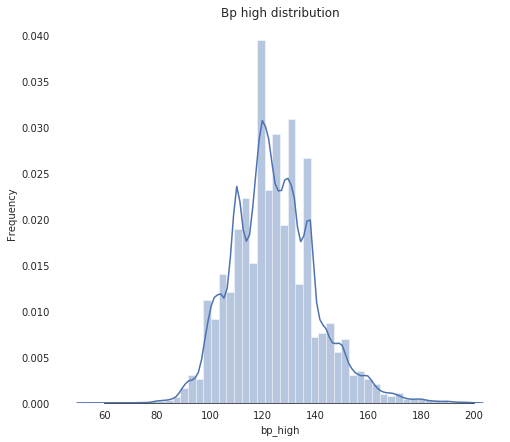

In [106]:
#data_pd[['bp_high']] = data_pd[['bp_high']].astype('float')
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(temp_dt['bp_high'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="bp_high")
ax.set(title="Bp high distribution")
sns.despine(trim=True, left=True)
plt.show()

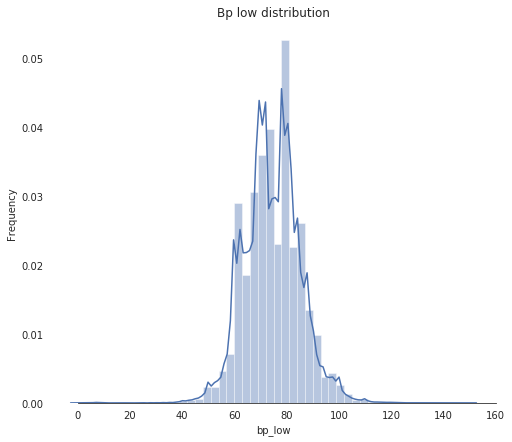

In [107]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(data_pd['bp_low'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="bp_low")
ax.set(title="Bp low distribution")
sns.despine(trim=True, left=True)
plt.show()

In [108]:
len(pd.Series(data_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

6157

In [109]:
pd.Series(data_pd["RecordedYear"].tolist()).sort_values().unique()

array([2014, 2015, 2016, 2017, 2018, 2019])

In [110]:
len(data_pd[data_pd['RecordedYear']==2019])

21272

In [111]:
mean_bp = data_pd.groupby(['Deidentified_Pat_ID'])[['bp_high','bp_low']].mean()
mean_bp.head()

,bp_high,bp_low
Deidentified_Pat_ID,,
MGVKKNZN,120.000000,78.000000
MGVNDNAK,102.000000,66.000000
MNAAOKVG,124.000000,78.800000
MNADDANN,127.333333,85.333333
MNADOVKN,113.173913,71.304348


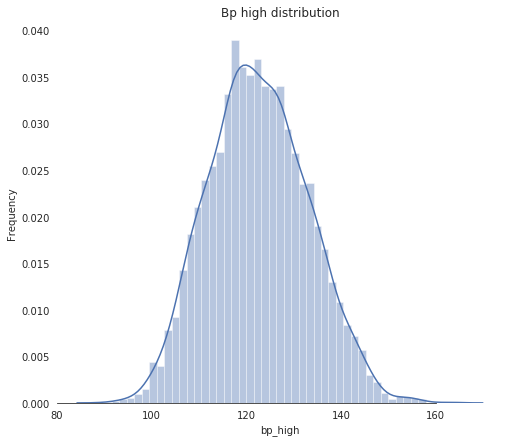

In [112]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(mean_bp['bp_high'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="bp_high")
ax.set(title="Bp high distribution")
sns.despine(trim=True, left=True)
plt.show()

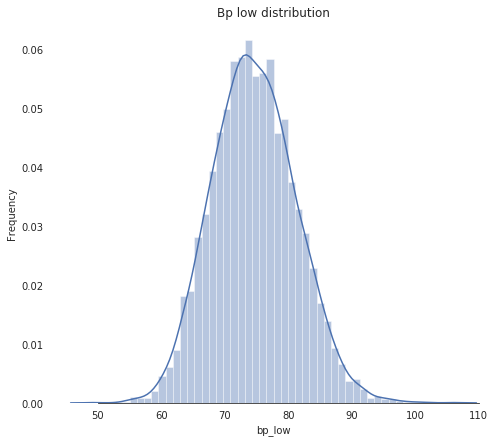

In [113]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(mean_bp['bp_low'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="bp_low")
ax.set(title="Bp low distribution")
sns.despine(trim=True, left=True)
plt.show()

In [114]:
single_data1 = data_pd.drop_duplicates(["Deidentified_Pat_ID"], keep='last')
single_data1.head(n=10)

,Deidentified_Pat_ID,BP,RecordedYear,bp_high,bp_low
55590,MGVKKNZN,120/78,2018,120,78
60324,MGVNDNAK,102/66,2019,102,66
103211,MNAAOKVG,136/80,2017,136,80
36829,MNADDANN,134/98,2017,134,98
88480,MNADOVKN,139/95,2016,139,95
43822,MNADZOHA,138/88,2017,138,88
155783,MNAGDKZZ,132/68,2017,132,68
115513,MNANKNAN,154/87,2018,154,87
92211,MNANZAKG,150/84,2017,150,84
115826,MNAODHZZ,168/93,2019,168,93


In [115]:
single_data1.shape

(6157, 5)

In [116]:
single_data1.to_csv(bp_file_p, index=False)

In [117]:
single_data1.max()

Deidentified_Pat_ID    ZZZZZTV
BP                       98/60
RecordedYear              2019
bp_high                    430
bp_low                     148
dtype: object

In [118]:
single_data1.describe()

,RecordedYear,bp_high,bp_low
count,6157.000000,6157.000000,6157.000000
mean,2016.841156,144.323372,82.390287
std,1.515603,19.612106,11.606942
min,2014.000000,90.000000,8.000000
25%,2016.000000,131.000000,74.000000
50%,2017.000000,140.000000,82.000000
75%,2018.000000,156.000000,90.000000
max,2019.000000,430.000000,148.000000


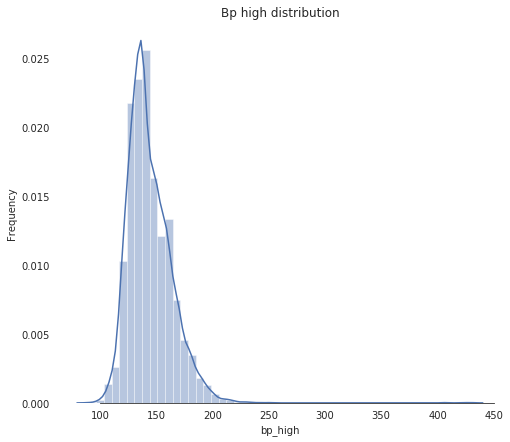

In [119]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(single_data1['bp_high'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="bp_high")
ax.set(title="Bp high distribution")
sns.despine(trim=True, left=True)
plt.show()

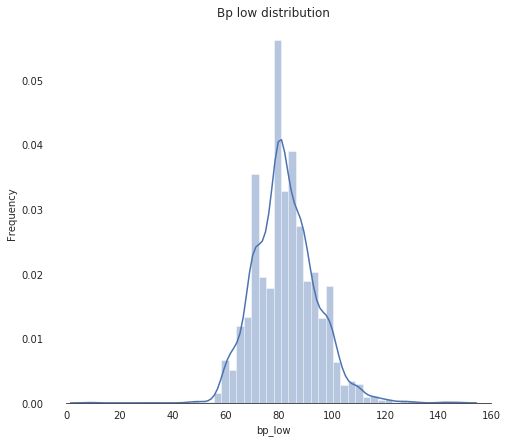

In [120]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(single_data1['bp_low'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="bp_low")
ax.set(title="Bp low distribution")
sns.despine(trim=True, left=True)
plt.show()

In [121]:
len(single_data1[single_data1["bp_high"]>300])

3

In [122]:
data_pd_less_200  = data_pd[data_pd['bp_high']<230]

In [123]:
data_pd_less_200.sort_values(["Deidentified_Pat_ID","bp_high"], inplace=True)
data_pd_less_200.head(n=10)


,Deidentified_Pat_ID,BP,RecordedYear,bp_high,bp_low
55590,MGVKKNZN,120/78,2018,120,78
60324,MGVNDNAK,102/66,2019,102,66
172627,MNAAOKVG,112/68,2019,112,68
39828,MNAAOKVG,122/82,2017,122,82
42932,MNAAOKVG,124/76,2017,124,76
26359,MNAAOKVG,126/88,2016,126,88
103211,MNAAOKVG,136/80,2017,136,80
116398,MNADDANN,116/88,2019,116,88
58727,MNADDANN,124/92,2018,124,92
118604,MNADDANN,124/76,2019,124,76


In [124]:
data_pd_less_200_1 = data_pd_less_200.drop_duplicates(["Deidentified_Pat_ID"], keep='last')
data_pd_less_200_1.head(n=10)

,Deidentified_Pat_ID,BP,RecordedYear,bp_high,bp_low
55590,MGVKKNZN,120/78,2018,120,78
60324,MGVNDNAK,102/66,2019,102,66
103211,MNAAOKVG,136/80,2017,136,80
36829,MNADDANN,134/98,2017,134,98
88480,MNADOVKN,139/95,2016,139,95
43822,MNADZOHA,138/88,2017,138,88
155783,MNAGDKZZ,132/68,2017,132,68
115513,MNANKNAN,154/87,2018,154,87
92211,MNANZAKG,150/84,2017,150,84
115826,MNAODHZZ,168/93,2019,168,93


In [125]:
data_pd_less_200_1.describe()

,RecordedYear,bp_high,bp_low
count,6157.000000,6157.000000,6157.000000
mean,2016.842131,144.162742,82.390775
std,1.515276,18.551480,11.594975
min,2014.000000,90.000000,8.000000
25%,2016.000000,131.000000,74.000000
50%,2017.000000,140.000000,82.000000
75%,2018.000000,156.000000,90.000000
max,2019.000000,228.000000,148.000000


In [126]:
len(data_pd_less_200_1)

6157

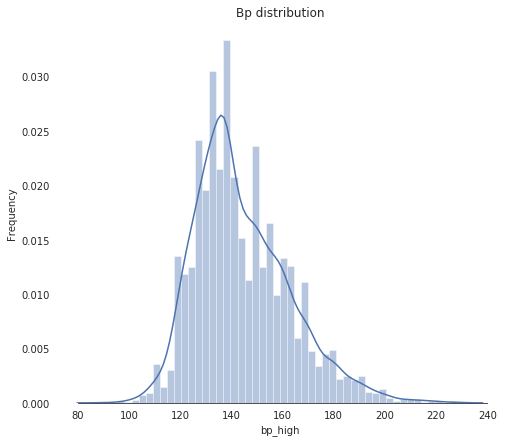

In [127]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(data_pd_less_200_1['bp_high'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="bp_high")
ax.set(title="Bp distribution")
sns.despine(trim=True, left=True)
plt.show()

In [128]:
data_pd_less_200_1.to_csv(bp_file_p, index=False)

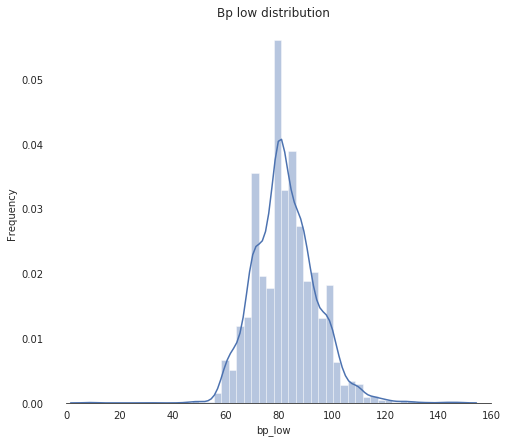

In [129]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(data_pd_less_200_1['bp_low'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="bp_low")
ax.set(title="Bp low distribution")
sns.despine(trim=True, left=True)
plt.show()